In [491]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
%cd /Users/abhilashsinghme/Downloads

/Users/abhilashsinghme/Downloads


In [492]:
# Importing our transactional cleaned data

trans_df = pd.read_csv('trans_df.csv')
trans_df.drop('Unnamed: 0', axis = 1, inplace = True)
trans_df.InvoiceDate = pd.to_datetime(trans_df.InvoiceDate)
trans_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1007907,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
1007908,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
1007909,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60
1007910,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85


In [655]:
# Calculating the percentage of missing customer ID in our data

(len(trans_df[trans_df['Customer ID']==-1]['Customer ID']))/len(trans_df['Customer ID'])

0.22669340180491948

In [656]:
(np.sum(trans_df[trans_df['Customer ID']==-1]['Revenue']))/np.sum(trans_df['Revenue'])

0.15100728863747964


a) 22.6% of the transactions data has no customer IDs.

b) 15 % of the total revenue is from the customers who does not have any Customer ID associated with them.

We can't just rule out the data with no customer ids as they contribute to the revenue.

In [657]:
# Lets define a new dataframe where we have customer ids available.

cust_df = trans_df[trans_df['Customer ID']!=-1]
cust_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1007907,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
1007908,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
1007909,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60
1007910,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,14.85


# BASIC EXPLORATION

### Frequently Purchased Products

Text(0.5, 1.0, 'Frequently Purchased Products')

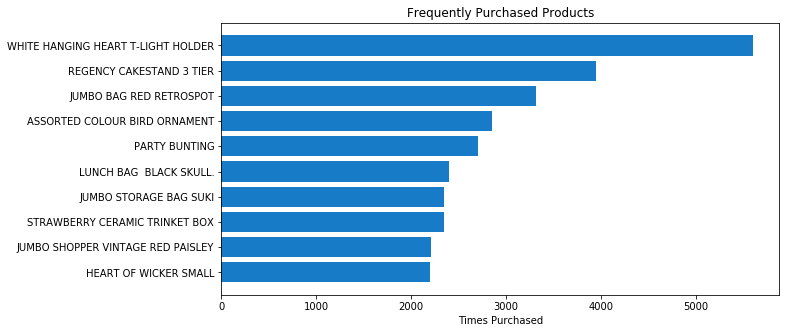

In [658]:
prod=pd.DataFrame(trans_df['Description'].value_counts().head(10)).sort_values(by='Description')
plt.figure(figsize = (10,5))
plt.barh(prod.index, prod.Description, color = '#187bc8')
plt.xlabel('Times Purchased')
plt.title('Frequently Purchased Products')


### Purchases by time

Text(0.5, 1.0, 'Hourly Purchases')

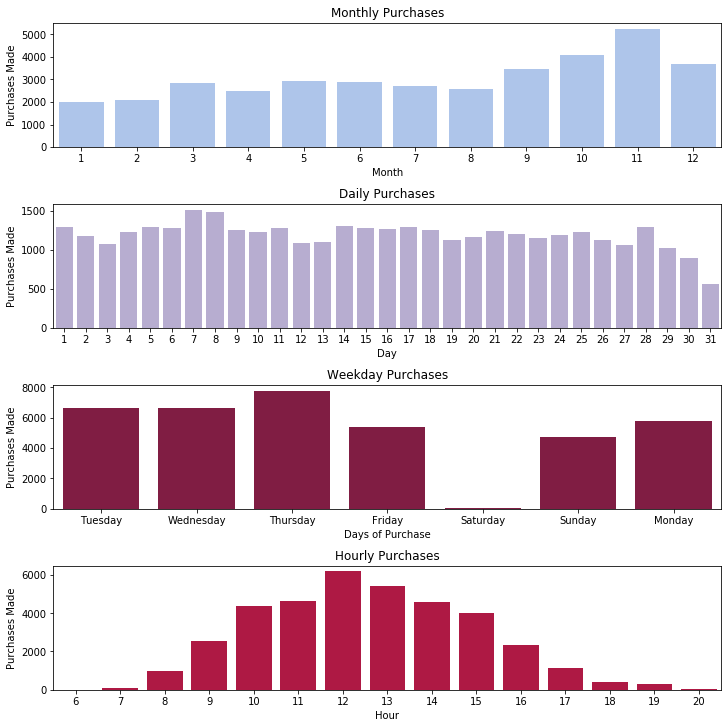

In [659]:
# Subplots by different time subsets.

fig, ax = plt.subplots(4,1, constrained_layout = True, figsize=(10,10))
sns.countplot(cust_df[['Invoice','InvoiceDate']].drop_duplicates().InvoiceDate.dt.month, color ='#a4c2f4', ax=ax[0])
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Purchases Made')
ax[0].set_title('Monthly Purchases')

sns.countplot(cust_df[['Invoice','InvoiceDate']].drop_duplicates().InvoiceDate.dt.day, color ='#b4a7d6', ax=ax[1])
ax[1].set_xlabel('Day')
ax[1].set_ylabel('Purchases Made')
ax[1].set_title('Daily Purchases')

sns.countplot(cust_df[['Invoice','InvoiceDate']].drop_duplicates().InvoiceDate.dt.weekday_name, color ='#900c3f', ax=ax[2])
ax[2].set_xlabel('Days of Purchase')
ax[2].set_ylabel('Purchases Made')
ax[2].set_title('Weekday Purchases')

sns.countplot(cust_df[['Invoice','InvoiceDate']].drop_duplicates().InvoiceDate.dt.hour, color ='#c70039', ax=ax[3])
ax[3].set_xlabel('Hour')
ax[3].set_ylabel('Purchases Made')
ax[3].set_title('Hourly Purchases')

Basic Insights:

a) The holidays months have really higher purchases. Gift products do go along with holidays.

b) There is no clear correlation among the days of the months and the times of purchases made.

c) There are almost no purchases on Saturdays. Strange !

d) The purchases are only made between 7 AM to 7 PM. The customer base might be a retail business having standard working hours during which they make purchases.

### Country

### The proportion of purchases made within United Kingdom.

In [663]:
trans_df['Country'].value_counts(normalize = True).head(1)

United Kingdom    0.918768
Name: Country, dtype: float64

Almost 92 % purchases are made within united kingdom itself. The transportation or the shipping cost within the same country is intuitively the best viable option to procure the product supplies.

# Understanding Customer Metrics

In [518]:
# Around 90% of the transactions are from United Kingdom.

# Let us filter the united kingdom transactions with known customer IDs.

uk_df = trans_df[(trans_df['Country']=='United Kingdom') & (trans_df['Customer ID']!=-1)]
uk_df.reset_index(drop=True, inplace = True)

In [519]:
uk_df['Price'].describe()

count    700388.000000
mean          3.065463
std          25.598485
min           0.001000
25%           1.250000
50%           1.950000
75%           3.750000
max       10953.500000
Name: Price, dtype: float64

Around 75% of the products sold have price less than or equal to 3.75. The maximum price of the product sold is 25111.

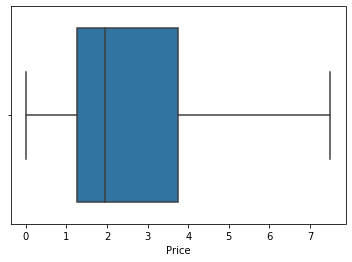

In [520]:
# lets plot a boxplot without statistical outliers

sns.boxplot(uk_df['Price'], showfliers = False)

In [664]:
low_price_products = uk_df[uk_df['Price'] < 8]
low_price_products

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0
...,...,...,...,...,...,...,...,...,...
700382,581585,23145,ZINC T-LIGHT HOLDER STAR LARGE,12,2011-12-09 12:31:00,0.95,15804,United Kingdom,11.4
700383,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804,United Kingdom,23.4
700384,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom,23.6
700385,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113,United Kingdom,30.0


In [522]:
low_price_perc = uk_df[uk_df['Price']<=8].shape[0]/uk_df['Price'].shape[0]*100

print("{:.2f} % of the transactions made were less than 8 pounds.".format(low_price_perc))

93.82 % of the transactions made were less than 8 pounds.


In [523]:
low_price_rev = np.sum(uk_df[uk_df['Price']<=8].Revenue)/np.sum(uk_df.Revenue)*100

print("{:.2f} % of the revenue is contributed by those products.".format(low_price_rev))

88.85 % of the revenue is contributed by those products.


As the prices of the products within our large dataset is too low (8 pounds) and the proportion of those products are too high, any major outlier will hardly skew our mean.

### Classifying Customers

In [157]:
# Classifying Customers as New and Returning

# Based on any determined time period such as Daily, Weekly or Yearly, we can classify them as new or loyal.

# Lets classify the customers based on months. 

cust_type=uk_df.drop_duplicates(['Invoice','Customer ID'])
cust_type.reset_index(drop=True, inplace = True)
cust_type.loc[:,'Type']=np.nan


for cust in cust_type['Customer ID'].unique():
    cust_type.loc[cust_type[cust_type['Customer ID']==cust].index,'Type']='Repeat'
    cust_type.loc[cust_type[cust_type['Customer ID']==cust].index[0],'Type']='New'

cust_type

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Type
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,New
1,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085,United Kingdom,30.60,Repeat
2,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078,United Kingdom,59.50,New
3,489437,22143,CHRISTMAS CRAFT HEART DECORATIONS,6,2009-12-01 09:08:00,2.10,15362,United Kingdom,12.60,New
4,489438,21329,DINOSAURS WRITING SET,28,2009-12-01 09:24:00,0.98,18102,United Kingdom,27.44,New
...,...,...,...,...,...,...,...,...,...,...
33536,581582,23552,BICYCLE PUNCTURE REPAIR KIT,6,2011-12-09 12:21:00,2.08,17581,United Kingdom,12.48,Repeat
33537,581583,20725,LUNCH BAG RED RETROSPOT,40,2011-12-09 12:23:00,1.45,13777,United Kingdom,58.00,Repeat
33538,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,2011-12-09 12:25:00,0.72,13777,United Kingdom,51.84,Repeat
33539,581585,22481,BLACK TEA TOWEL CLASSIC DESIGN,12,2011-12-09 12:31:00,0.39,15804,United Kingdom,4.68,Repeat


### Customer Retention and Customer Acquisition Rate

Text(0.5, 1.0, 'Customer Retention Rate vs Customer Acquisition Rate')

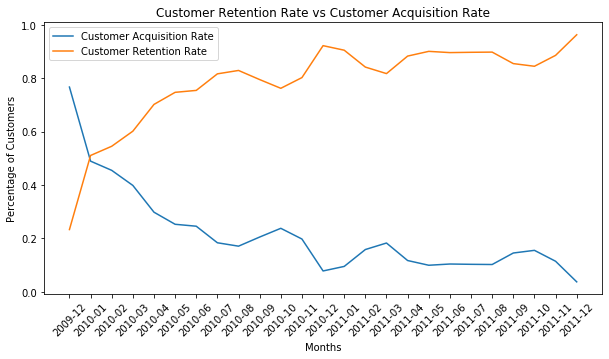

In [665]:
cust_type.loc[:,'YM']=cust_type.InvoiceDate.dt.strftime("%Y-%m")

time = {}
for date in cust_type['YM'].unique():
    time[date]=(cust_type[cust_type['YM']==date].drop_duplicates(['Customer ID','Type'])['Type'].value_counts())
monthly_cust=pd.DataFrame(time).transpose()


plt.figure(figsize=(10,5))
plt.plot(monthly_cust['New']/(monthly_cust['New']+monthly_cust['Repeat']))
plt.plot(monthly_cust['Repeat']/(monthly_cust['New']+monthly_cust['Repeat']))
plt.legend(['Customer Acquisition Rate','Customer Retention Rate'])
plt.xlabel('Months')
plt.ylabel('Percentage of Customers')
plt.xticks(rotation = 45)
plt.title('Customer Retention Rate vs Customer Acquisition Rate')

As per our dataset assumption, suppose the store started it's operations from Dec 2009. The existing customers seem to increasingly buy products as the time passed. However, evidently, the store has been inadequate in successfully acquiring new customers. 

The store seems to attract its previous customers effectively. Especially during the holiday months of November and December, as the demand for the gift products increases, the retailers customers look for a trustworthy and an already known supplier. This suggests why the repeat customer rate is highest during that time of the year.

Stores having a wide variety of products catalogue tend to have a higher repeat order rate. Customers have varied options to choose from the products offering, increasing the repeat purchases.

In [666]:
#Joining our two datasets

join = pd.merge(uk_df, cust_type, how = 'inner', on = 'Invoice')
join.head()

,Invoice,StockCode_x,Description_x,Quantity_x,InvoiceDate_x,Price_x,Customer ID_x,Country_x,Revenue_x,StockCode_y,Description_y,Quantity_y,InvoiceDate_y,Price_y,Customer ID_y,Country_y,Revenue_y,Type,YM
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,New,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,New,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,New,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,New,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,New,2009-12


### Average Order Value

(0, 1000)

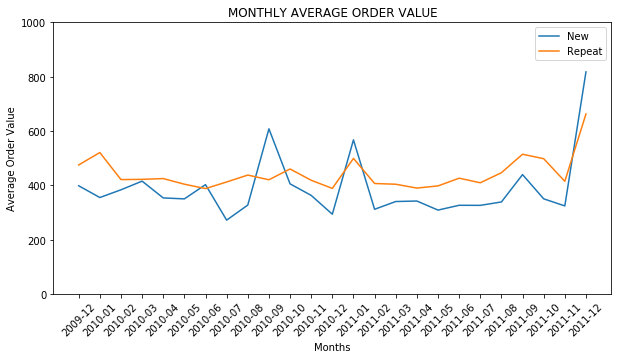

In [667]:
# Monthly Average Order Value

aov = (join.groupby(['YM','Type']).Revenue_x.sum().unstack()/join.groupby(['YM','Type']).Invoice.nunique().unstack())
plt.figure(figsize=(10,5))
plt.plot(aov, )
plt.legend(['New', 'Repeat'])
plt.xlabel('Months')
plt.ylabel('Average Order Value')
plt.xticks(rotation = 45)
plt.title('MONTHLY AVERAGE ORDER VALUE')
plt.ylim(0,1000)

Text(0.5, 1.0, 'MONTHLY AVERAGE ORDER VALUE')

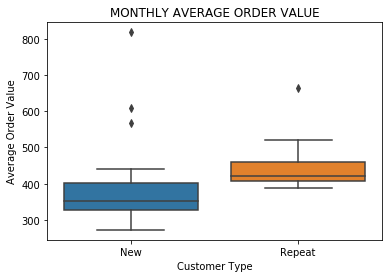

In [269]:
ym_type = join.groupby(['YM','Type']).Revenue_x.sum().unstack()/join.groupby(['YM','Type']).Invoice.nunique().unstack()
sns.boxplot(x='Type', y='value', data = pd.melt(ym_type))
plt.xlabel('Customer Type')
plt.ylabel('Average Order Value')
plt.title('MONTHLY AVERAGE ORDER VALUE')

## Customer Lifetime Value

### Average Order Size (AOS)

"The average order size (AOS) is the average amount of money that a customer spends each time they place an order. The average order size is calculated by calculating your total customer revenue for a given period and dividing the total orders performed by these customers to calculate your average order size."

In [625]:
aos = join.Revenue_x.sum()/len(join['Invoice'].unique())
aos

429.0043504069646

The bill value per transaction is around 429 pounds. 

### Average Order Frequency (AOF) 


"The average order frequency (AOF) represents the average amount of orders placed by each customer. Your average order frequency (AOF) is calculated by compiling the total number of orders for a given period and dividing it by the total number of customers for a given period."

In [630]:
aof = (len(join['Invoice'].unique()))/(len(join['Customer ID_x'].unique()))
print("{:.2f} Pounds".format(aof))

6.27 Pounds


### Average Customer Value (ACV)


"The average customer value (ACV) is the average revenue value that each customer brings to your business during a given timeframe. The average customer value can be determined by multiplying the average order size (AOS) with the average order frequency (AOF)."



In [634]:
acv = (aos*aof)/2
print("Average Customer Value Per Year is {:.2f} Pounds.".format(acv))

Average Customer Value Per Year is 1344.79 Pounds.


### Average Customer Lifespan (ACL)


"The average customer lifespan is the average number of days between first order date and last order date of all of your customers. Convert the average number of days into years by dividing your number by 365."


In [635]:
total_days = np.sum((cust_type.groupby('Customer ID').InvoiceDate.max() - cust_type.groupby('Customer ID').InvoiceDate.min()).dt.days)
total_days

1475507

In [636]:
total_cust = len(cust_type['Customer ID'].unique())
total_cust

5350

In [641]:
acl = (total_days/total_cust)/365
print("Average Customer Lifespan Per Year is {:.2f}.".format(acl))

Average Customer Lifespan Per Year is 0.76.


### Customer Lifetime Value (CLV)


"To calculate your average customer lifetime value (CLV) using this simple method, multiply your average customer lifespan (ACL) to your average customer value (ACV)."

In [643]:
clv = acl*acv
print("Average Customer Lifetime Value is {:.2f}.".format(clv))

Average Customer Lifetime Value is 1016.13.


Customer Lifetime Value calculation is different for every use case. In our case, we have used the simplest formula to calculate the average customer lifetime value. In a nutshell, the more purchases the customers makes the more loyal the customer becomes, increasing the customer lifetime value.
   
a) The average customer lifetime value per year comes to be around 1016 pounds. In this case, the average cost of acquisition or average cost of serving one customer per year needs to be way below 1016, in order to be profitable.

b) In our case, there are many non repeating customers. By simply converting them to make repeat purchases with average order size can result in the increase of the lifetime value.

c) Similarly, increasing the average order size of the customers can also result in higher clv.


### CLV for Loyal Customer

#### Lets calculate CLV for customers who made more than one purchase. (Repeat Purchase)

In [569]:
days_diff = (cust_type.groupby('Customer ID').InvoiceDate.max() - cust_type.groupby('Customer ID').InvoiceDate.min()).dt.total_seconds()
days_diff

Customer ID
12346    34565220.0
12608           0.0
12745     7579440.0
12746           0.0
12747    63076260.0
            ...    
18283    56573160.0
18284           0.0
18285           0.0
18286    21345120.0
18287    45696840.0
Name: InvoiceDate, Length: 5350, dtype: float64

In [593]:
days_diff[days_diff != 0.0].index

Int64Index([12346, 12745, 12747, 12748, 12749, 12820, 12821, 12822, 12823,
            12825,
            ...
            18275, 18276, 18277, 18278, 18280, 18281, 18282, 18283, 18286,
            18287],
           dtype='int64', name='Customer ID', length=3874)

In [594]:
repeat = join[~join['Customer ID_x'].isin(days_diff[days_diff == 0].index)]
repeat

,Invoice,StockCode_x,Description_x,Quantity_x,InvoiceDate_x,Price_x,Customer ID_x,Country_x,Revenue_x,StockCode_y,Description_y,Quantity_y,InvoiceDate_y,Price_y,Customer ID_y,Country_y,Revenue_y,Type,YM
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.4,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,New,2009-12
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,New,2009-12
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.0,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,New,2009-12
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.8,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,New,2009-12
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.0,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,New,2009-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700383,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804,United Kingdom,23.4,22481,BLACK TEA TOWEL CLASSIC DESIGN,12,2011-12-09 12:31:00,0.39,15804,United Kingdom,4.68,Repeat,2011-12
700384,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom,23.6,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom,23.60,Repeat,2011-12
700385,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113,United Kingdom,30.0,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom,23.60,Repeat,2011-12
700386,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113,United Kingdom,214.8,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113,United Kingdom,23.60,Repeat,2011-12


In [646]:
aos_r = repeat.Revenue_x.sum()/len(repeat['Customer ID_x'].unique())
print("Average Order Size of Repeat Customer is {:.2f}.".format(aos_r))

Average Order Size of Repeat Customer is 3591.63.


In [647]:
aof_r = (len(repeat['Invoice'].unique()))/(len(repeat['Customer ID_x'].unique()))
print("Average Order Frequency of Repeat Customer is {:.2f}.".format(aof_r))

Average Order Frequency of Repeat Customer is 8.28.


In [649]:
acv_r = (aos_r * aof_r)/2
print("Average Repeat Customer Value is {:.2f}.".format(acv_r))

Average Repeat Customer Value is 14862.97.


In [615]:
total_days_n = np.sum((repeat.groupby('Customer ID_x').InvoiceDate_x.max() - repeat.groupby('Customer ID_x').InvoiceDate_x.min()).dt.days)
total_days_n

1475507

In [616]:
repeat_len = len((repeat.groupby('Customer ID_x').InvoiceDate_x.max() - repeat.groupby('Customer ID_x').InvoiceDate_x.min()).dt.days)
repeat_len

3874

In [653]:
acl_r = (total_days_n/repeat_len)/365
print("Average Repeat Customer Lifespan is {:.2f}.".format(acl_r))

Average Repeat Customer Lifespan is 1.04.


In [654]:
clv_r = acv_n * acl_n
print("Average Repeat Customer Lifetime Value is {:.2f}.".format(clv_r))

Average Repeat Customer Lifetime Value is 31018.75.


The drastic customer lifetime value for repeat customers is drastically high. This is solely because of their higher average order size and frequency of buying.

In this case, our strategy must be focused on customer retention with higher order volume. Recommending ways to make customers loyal will be the key to our success.